## Task 3.3 Transpile and Optimize Circuits

1. Initialization
2. Layout
3. Routing
4. Translation
5. Optimization
6. Scheduling

1. Initialization stage is used to include customized optimizations and updates gates that use more than 2 qubits in one and two qubit gates

2. Layout stage is used to map from virtual to physical qubits on the backend that will be used

minimize the number of SWAPs , 
2 passes : find a perfect layout without swaps then a herustic layout
    * TrivialLayout and then  VF2Layout
    * DenseLayout and then SabreLayout

3. Routing stage is used to find the minimum number of swaps required implment SabreSwap

Text(0, 0.5, 'Counts')

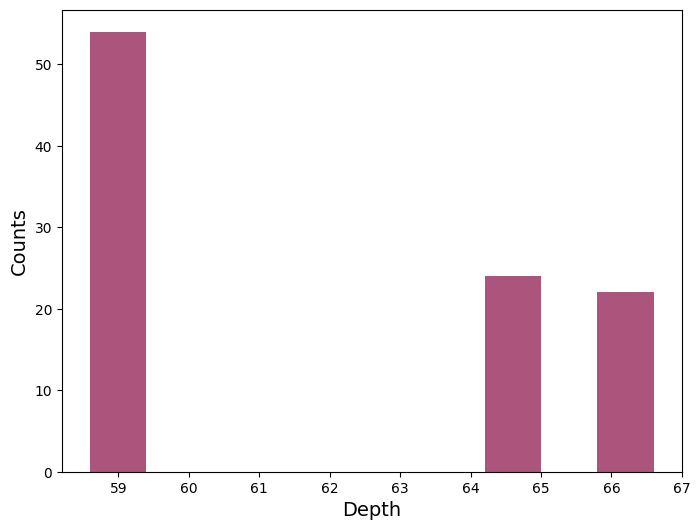

In [1]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAuckland, FakeWashingtonV2
from qiskit.transpiler import generate_preset_pass_manager
 
backend = FakeAuckland()
 
ghz = QuantumCircuit(15)
ghz.h(0)
ghz.cx(0, range(1, 15))
 
depths = []
for seed in range(100):
    pass_manager = generate_preset_pass_manager(
        optimization_level=1,
        backend=backend,
        layout_method="trivial",  # Fixed layout mapped in circuit order
        seed_transpiler=seed,  # For reproducible results
    )
    depths.append(pass_manager.run(ghz).depth())
 
plt.figure(figsize=(8, 6))
plt.hist(depths, align="left", color="#AC557C")
plt.xlabel("Depth", fontsize=14)
plt.ylabel("Counts", fontsize=14)

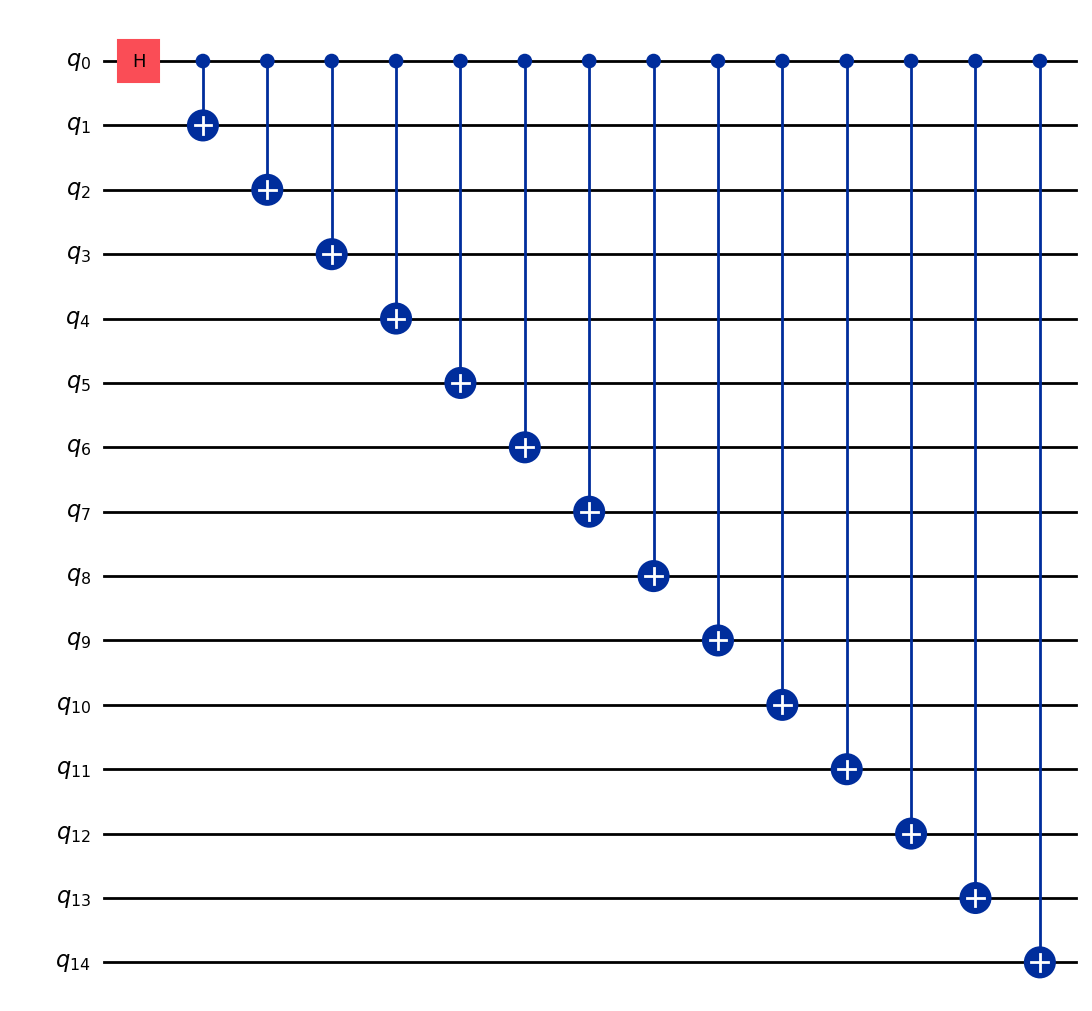

In [2]:
ghz.draw("mpl", idle_wires=False)

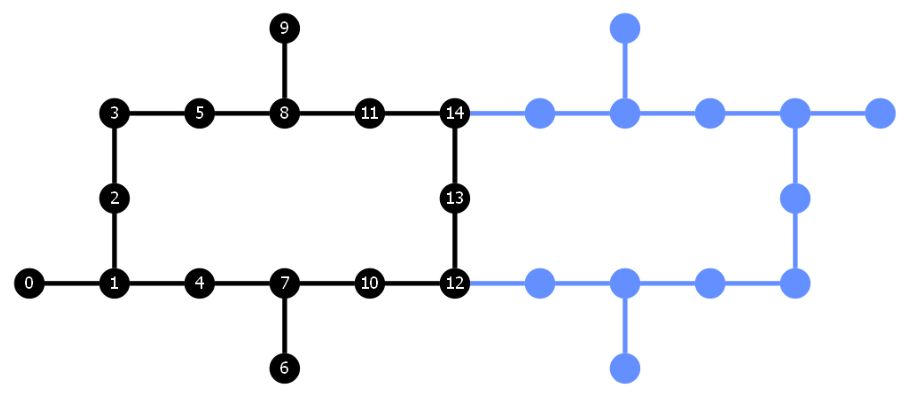

In [3]:
from qiskit.visualization import plot_circuit_layout
 
# Plot the hardware graph and indicate which hardware qubits were chosen to run the circuit
transpiled_circ = pass_manager.run(ghz)
plot_circuit_layout(transpiled_circ, backend)

4. Translation stage translate the gates in teh circuit to the native basis gates 

native gates:['cx', 'delay', 'for_loop', 'id', 'if_else', 'measure', 'reset', 'rz', 'switch_case', 'sx', 'x']


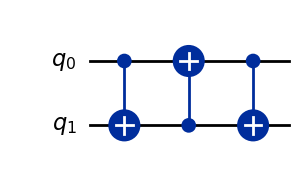

In [4]:
print("native gates:" + str(sorted(backend.operation_names)))
qc = QuantumCircuit(2)
qc.swap(0, 1)
qc.decompose().draw("mpl")

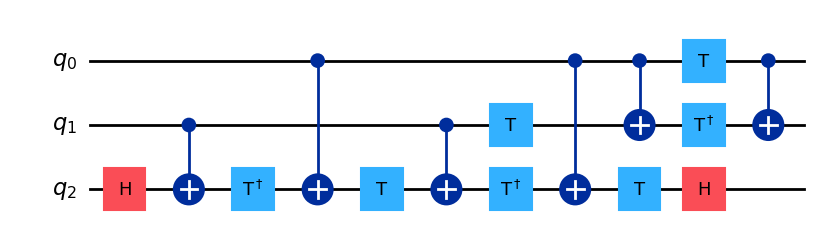

In [5]:
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
qc.decompose().draw("mpl")

5. Optimization stage is used decrase the depth of the circuit
uses different optimization levels

* optimization_level=1 , Uses Optimize1qGatesDecomposition and CXCancellation
* optimization_level=2 , Uses CommutativeCancellation
* optimization_level=3 , Uses Collect2qBlocks, ConsolidateBlocks, UnitarySynthesis, Optimize1qGateDecomposition , CommutativeCancellation



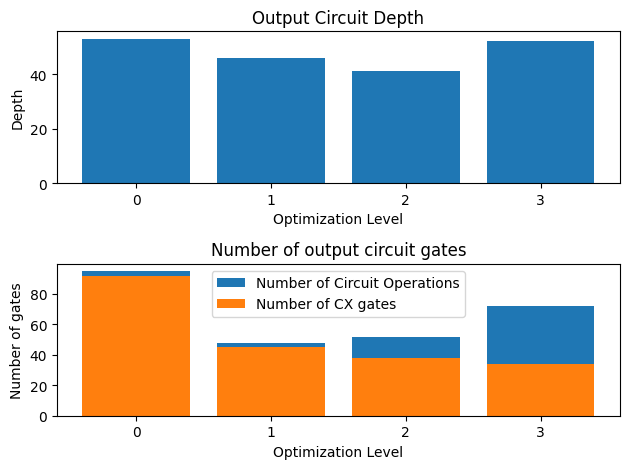

In [6]:
ghz = QuantumCircuit(15)
ghz.h(0)
ghz.cx(0, range(1, 15))
 
depths = []
gate_counts = []
multiqubit_gate_counts = []
levels = [str(x) for x in range(4)]
for level in range(4):
    pass_manager = generate_preset_pass_manager(
        optimization_level=level,
        backend=backend,
        seed_transpiler=1234,
    )
    circ = pass_manager.run(ghz)
    depths.append(circ.depth())
    gate_counts.append(sum(circ.count_ops().values()))
    multiqubit_gate_counts.append(circ.count_ops()["cx"])
 
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.bar(levels, depths, label="Depth")
ax1.set_xlabel("Optimization Level")
ax1.set_ylabel("Depth")
ax1.set_title("Output Circuit Depth")
ax2.bar(levels, gate_counts, label="Number of Circuit Operations")
ax2.bar(levels, multiqubit_gate_counts, label="Number of CX gates")
ax2.set_xlabel("Optimization Level")
ax2.set_ylabel("Number of gates")
ax2.legend()
ax2.set_title("Number of output circuit gates")
fig.tight_layout()
plt.show()

6. Scheduling stage does not run by default like initialization , used to account to all idle times of the circuit
insers delays instructions to account for idle times and inspect how long the circuit will run on the backend

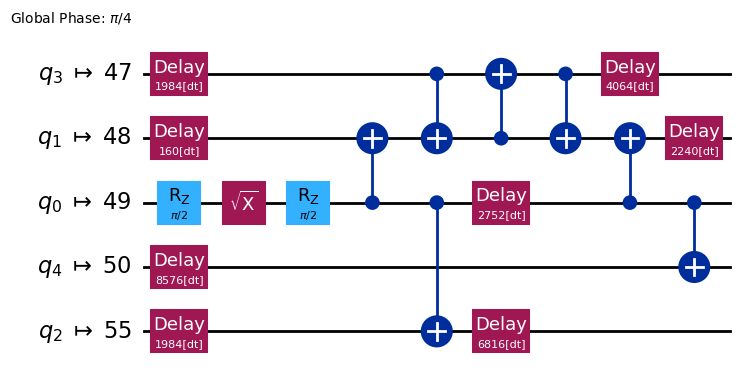

In [7]:
ghz = QuantumCircuit(5)
ghz.h(0)
ghz.cx(0, range(1, 5))
 
 
# Use fake backend
backend = FakeWashingtonV2()
 
# Run with optimization level 3 and 'asap' scheduling pass
pass_manager = generate_preset_pass_manager(
    optimization_level=3,
    backend=backend,
    scheduling_method="asap",
    seed_transpiler=1234,
)
 
 
circ = pass_manager.run(ghz)
circ.draw(output="mpl", idle_wires=False)

In [9]:
timeline.draw()

NameError: name 'timeline' is not defined